In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
import cvxopt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("features_30_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [3]:
df.shape

(1000, 60)

In [4]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [5]:
# Finding misssing values
# Find all columns with any NA values
print("Columns containing missing values",list(df.columns[df.isnull().any()]))

Columns containing missing values []


In [6]:
class_encod=df.iloc[:,-1]
converter=LabelEncoder()
y=converter.fit_transform(class_encod)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [7]:
#features
print(df.iloc[:,:-1])

            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0    blues.00000.wav  661794          0.350088         0.088757  0.130228   
1    blues.00001.wav  661794          0.340914         0.094980  0.095948   
2    blues.00002.wav  661794          0.363637         0.085275  0.175570   
3    blues.00003.wav  661794          0.404785         0.093999  0.141093   
4    blues.00004.wav  661794          0.308526         0.087841  0.091529   
..               ...     ...               ...              ...       ...   
995   rock.00095.wav  661794          0.352063         0.080487  0.079486   
996   rock.00096.wav  661794          0.398687         0.075086  0.076458   
997   rock.00097.wav  661794          0.432142         0.075268  0.081651   
998   rock.00098.wav  661794          0.362485         0.091506  0.083860   
999   rock.00099.wav  661794          0.358401         0.085884  0.054454   

      rms_var  spectral_centroid_mean  spectral_centroid_var  \
0    0.0028

In [8]:
# Drop the column filename as it is no longer required for training
df=df.drop(labels="filename",axis=1)

In [9]:
#scaling
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:,:-1],dtype=float))

In [10]:
# splitting 70% data into training set and the remaining 30% to test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [11]:
# test data size
len(y_test)

300

In [12]:
# size of training data
len(y_train)

700

In [13]:
# Applying Support Vector Machines to predict the results
# svclassifier = SVC(kernel='rbf')
# svclassifier.fit(X_train, y_train)
# print("Training set score: {:.3f}".format(svclassifier.score(X_train, y_train)))
# print("Test set score: {:.3f}".format(svclassifier.score(X_test, y_test)))
# y_pred = svclassifier.predict(X_test)
# cf_matrix3 = confusion_matrix(y_test, y_pred)
# sns.set(rc = {'figure.figsize':(9,4)})
# sns.heatmap(cf_matrix3, annot=True)
# print(classification_report(y_test, y_pred))
# plt.savefig('output//svm_rbf.png')

In [14]:
class FastSVM:
    def __init__(self, kernel='linear', C=1.0, degree=3, gamma='scale', coef0=0.0, max_iter=1000, tol=1e-3):
        self.kernel = kernel
        self.C = C
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        self.max_iter = max_iter
        self.tol = tol
        self.multi_class = {}
        
    def _compute_kernel(self, X1, X2):
        if self.gamma == 'scale':
            self.gamma = 1.0 / X1.shape[1]
            
        if self.kernel == 'linear':
            return np.dot(X1, X2.T)
        elif self.kernel == 'poly':
            return (self.gamma * np.dot(X1, X2.T) + self.coef0) ** self.degree
        elif self.kernel == 'rbf':
            # Vectorized RBF computation
            norm_X1 = np.sum(X1 ** 2, axis=1).reshape(-1, 1)
            norm_X2 = np.sum(X2 ** 2, axis=1)
            return np.exp(-self.gamma * (norm_X1 + norm_X2 - 2 * np.dot(X1, X2.T)))
        elif self.kernel == 'sigmoid':
            return np.tanh(self.gamma * np.dot(X1, X2.T) + self.coef0)
    
    def _train_binary(self, X, y):
        n_samples = X.shape[0]
        K = self._compute_kernel(X, X)
        alphas = np.zeros(n_samples)
        b = 0
        
        # SMO optimization
        for _ in range(self.max_iter):
            alpha_changed = 0
            for i in range(n_samples):
                Ei = self._decision_function_binary(K, alphas, y, b, i) - y[i]
                if ((y[i] * Ei < -self.tol and alphas[i] < self.C) or 
                    (y[i] * Ei > self.tol and alphas[i] > 0)):
                    
                    j = np.random.randint(n_samples)
                    while j == i:
                        j = np.random.randint(n_samples)
                    
                    Ej = self._decision_function_binary(K, alphas, y, b, j) - y[j]
                    
                    alpha_i_old = alphas[i]
                    alpha_j_old = alphas[j]
                    
                    if y[i] != y[j]:
                        L = max(0, alpha_j_old - alpha_i_old)
                        H = min(self.C, self.C + alpha_j_old - alpha_i_old)
                    else:
                        L = max(0, alpha_i_old + alpha_j_old - self.C)
                        H = min(self.C, alpha_i_old + alpha_j_old)
                    
                    if abs(L - H) < 1e-4:
                        continue
                        
                    eta = 2.0 * K[i,j] - K[i,i] - K[j,j]
                    if eta >= 0:
                        continue
                        
                    alphas[j] = alpha_j_old - y[j] * (Ei - Ej) / eta
                    alphas[j] = np.clip(alphas[j], L, H)
                    
                    if abs(alphas[j] - alpha_j_old) < 1e-5:
                        continue
                        
                    alphas[i] = alpha_i_old + y[i] * y[j] * (alpha_j_old - alphas[j])
                    
                    b1 = b - Ei - y[i] * (alphas[i] - alpha_i_old) * K[i,i] - \
                         y[j] * (alphas[j] - alpha_j_old) * K[i,j]
                    b2 = b - Ej - y[i] * (alphas[i] - alpha_i_old) * K[i,j] - \
                         y[j] * (alphas[j] - alpha_j_old) * K[j,j]
                    
                    if 0 < alphas[i] < self.C:
                        b = b1
                    elif 0 < alphas[j] < self.C:
                        b = b2
                    else:
                        b = (b1 + b2) / 2.0
                        
                    alpha_changed += 1
                    
            if alpha_changed == 0:
                break
                
        return {'X': X, 'y': y, 'alphas': alphas, 'b': b}
    
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        
        # One-vs-Rest Strategy
        for cls in self.classes_:
            y_binary = np.where(y == cls, 1, -1)
            self.multi_class[cls] = self._train_binary(X, y_binary)
        return self
    
    def _decision_function_binary(self, K, alphas, y, b, idx=None):
        if idx is not None:
            return np.sum(alphas * y * K[idx]) + b
        return np.sum(alphas * y * K, axis=1) + b
    
    def predict(self, X):
        n_samples = X.shape[0]
        scores = np.zeros((n_samples, len(self.classes_)))
        
        for i, cls in enumerate(self.classes_):
            clf = self.multi_class[cls]
            K = self._compute_kernel(X, clf['X'])
            scores[:, i] = self._decision_function_binary(
                K, clf['alphas'], clf['y'], clf['b']
            )
            
        return self.classes_[np.argmax(scores, axis=1)]
    
    def score(self, X, y):
        return np.mean(self.predict(X) == y)

SVC Training set score: 0.983
SVC Test set score: 0.677
SVM Training set score: 0.864
SVM Test set score: 0.653
              precision    recall  f1-score   support

           0       0.72      0.55      0.62        33
           1       0.81      0.85      0.83        34
           2       0.60      0.58      0.59        36
           3       0.56      0.63      0.59        30
           4       0.80      0.67      0.73        24
           5       0.62      0.69      0.65        26
           6       0.66      0.78      0.71        27
           7       0.79      0.87      0.83        30
           8       0.53      0.59      0.56        29
           9       0.46      0.35      0.40        31

    accuracy                           0.65       300
   macro avg       0.65      0.66      0.65       300
weighted avg       0.65      0.65      0.65       300



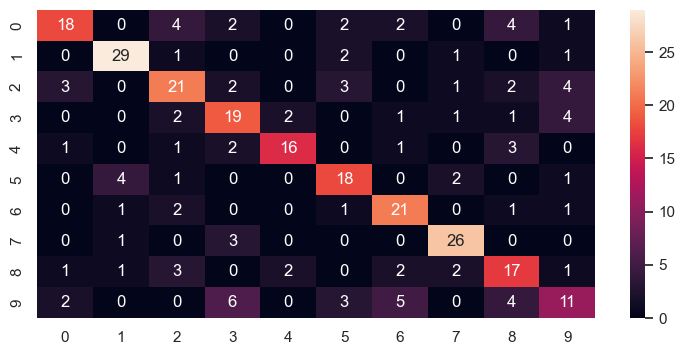

In [ ]:
# Linear SVM
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
print("SVC Training set score: {:.3f}".format(svclassifier.score(X_train, y_train)))
print("SVC Test set score: {:.3f}".format(svclassifier.score(X_test, y_test)))


svm = FastSVM(kernel='linear')
svm.fit(X_train, y_train)
print("SVM Training set score: {:.3f}".format(svm.score(X_train, y_train)))
print("SVM Test set score: {:.3f}".format(svm.score(X_test, y_test)))
y_pred = svm.predict(X_test)
cf_matrix3 = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(9,4)})
sns.heatmap(cf_matrix3, annot=True)
print(classification_report(y_test, y_pred))
plt.savefig('output//svm_linear.png')


SVC Training set score: 0.653
SVC Test set score: 0.567
SVM Training set score: 0.477
SVM Test set score: 0.433
              precision    recall  f1-score   support

           0       0.33      0.33      0.33        33
           1       0.67      0.85      0.75        34
           2       0.37      0.19      0.25        36
           3       0.33      0.10      0.15        30
           4       0.24      0.29      0.26        24
           5       0.39      0.58      0.47        26
           6       0.48      0.81      0.60        27
           7       0.56      0.63      0.59        30
           8       0.42      0.59      0.49        29
           9       0.00      0.00      0.00        31

    accuracy                           0.43       300
   macro avg       0.38      0.44      0.39       300
weighted avg       0.38      0.43      0.39       300



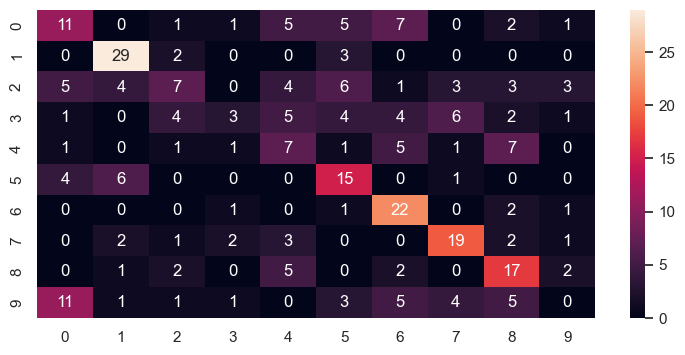

In [ ]:
# Sigmoid SVM
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
print("SVC Training set score: {:.3f}".format(svclassifier.score(X_train, y_train)))
print("SVC Test set score: {:.3f}".format(svclassifier.score(X_test, y_test)))


svm = FastSVM(kernel='sigmoid')
svm.fit(X_train, y_train)
print("SVM Training set score: {:.3f}".format(svm.score(X_train, y_train)))
print("SVM Test set score: {:.3f}".format(svm.score(X_test, y_test)))
y_pred = svm.predict(X_test)
cf_matrix3 = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(9,4)})
sns.heatmap(cf_matrix3, annot=True)
print(classification_report(y_test, y_pred))
plt.savefig('output//svm_sigmoid.png')


SVC Training set score: 0.780
SVC Test set score: 0.593
SVM Training set score: 0.946
SVM Test set score: 0.710
              precision    recall  f1-score   support

           0       0.85      0.70      0.77        33
           1       0.84      0.91      0.87        34
           2       0.92      0.64      0.75        36
           3       0.62      0.50      0.56        30
           4       0.77      0.71      0.74        24
           5       0.56      0.77      0.65        26
           6       0.62      0.93      0.75        27
           7       0.72      0.87      0.79        30
           8       0.58      0.62      0.60        29
           9       0.68      0.48      0.57        31

    accuracy                           0.71       300
   macro avg       0.72      0.71      0.70       300
weighted avg       0.73      0.71      0.71       300



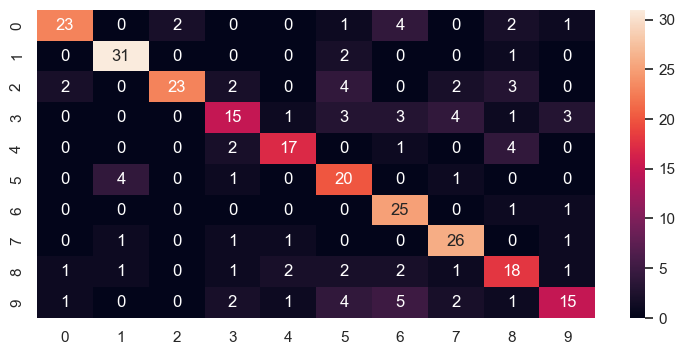

In [ ]:
# Poly SVM
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, y_train)
print("SVC Training set score: {:.3f}".format(svclassifier.score(X_train, y_train)))
print("SVC Test set score: {:.3f}".format(svclassifier.score(X_test, y_test)))


svm = FastSVM(kernel='poly')
svm.fit(X_train, y_train)
print("SVM Training set score: {:.3f}".format(svm.score(X_train, y_train)))
print("SVM Test set score: {:.3f}".format(svm.score(X_test, y_test)))
y_pred = svm.predict(X_test)
cf_matrix3 = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(9,4)})
sns.heatmap(cf_matrix3, annot=True)
print(classification_report(y_test, y_pred))
plt.savefig('output//svm_poly.png')

SVC Training set score: 0.889
SVC Test set score: 0.750
SVM Training set score: 0.929
SVM Test set score: 0.740
              precision    recall  f1-score   support

           0       0.84      0.64      0.72        33
           1       0.92      0.97      0.94        34
           2       0.71      0.75      0.73        36
           3       0.67      0.67      0.67        30
           4       0.72      0.75      0.73        24
           5       0.72      0.88      0.79        26
           6       0.64      0.85      0.73        27
           7       0.80      0.93      0.86        30
           8       0.67      0.69      0.68        29
           9       0.69      0.29      0.41        31

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.73       300
weighted avg       0.74      0.74      0.73       300



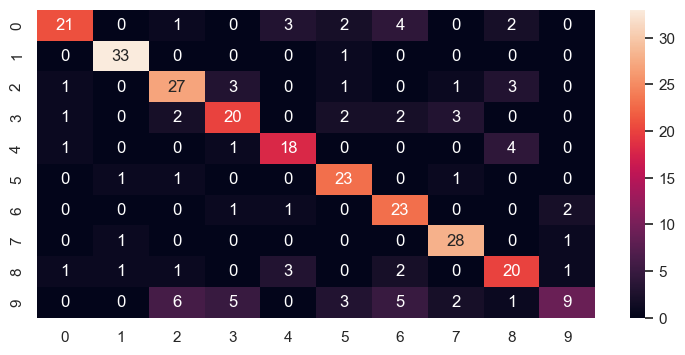

In [ ]:
# rbf SVM
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
print("SVC Training set score: {:.3f}".format(svclassifier.score(X_train, y_train)))
print("SVC Test set score: {:.3f}".format(svclassifier.score(X_test, y_test)))


svm = FastSVM(kernel='rbf')
svm.fit(X_train, y_train)
print("SVM Training set score: {:.3f}".format(svm.score(X_train, y_train)))
print("SVM Test set score: {:.3f}".format(svm.score(X_test, y_test)))
y_pred = svm.predict(X_test)
cf_matrix3 = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(9,4)})
sns.heatmap(cf_matrix3, annot=True)
print(classification_report(y_test, y_pred))
plt.savefig('output//svm_rbf.png')